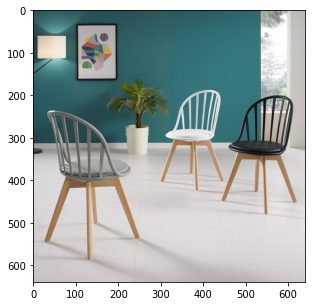

In [1]:
import mahotas as mh
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

tmp1 = Image.open("./datas/125507.png")
 
plt.figure(figsize=(5,5))
plt.imshow(tmp1)
plt.show()

In [2]:
from glob import glob

images = glob('./datas/*.png')

features = []
labels = []
for im in images:
    labels.append(im[:-len('./125457.png')])
    im = mh.imread(im)
    im = mh.colors.rgb2gray(im, dtype=np.uint8)
    features.append(mh.features.haralick(im).ravel())
    
features = np.array(features)
labels = np.array(labels)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

clf = Pipeline([('preproc', StandardScaler()), ('classifier', LogisticRegression())])

# from sklearn import cross_validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

loo = LeaveOneOut()

scores = cross_val_score(clf, features, labels, cv=loo)
print('Accuracy: {:.2%}'.format(scores.mean()))

Accuracy: 83.33%


In [3]:
sc = StandardScaler()
features = sc.fit_transform(features)
from scipy.spatial import distance
dists = distance.squareform(distance.pdist(features))

In [4]:
dists[0][0:29]

array([ 0.        ,  9.67728074,  5.95069779,  3.3559744 , 17.91452317,
        8.18740806, 10.22914877, 11.18861469,  7.50125688,  9.90749125,
       12.05715201,  5.62505639,  4.49861803,  6.29876268,  8.33119967,
        7.24950937,  9.3587026 ,  5.43433712,  4.19366795,  8.29416788,
        8.5216175 , 12.05344855, 20.48061742, 16.14950547])

In [5]:
def selectImage(n, m, dists, images):
    image_position = dists[n].argsort()[m]
    image = mh.imread(images[image_position])
    return image

def plotImages(n):
    plt.figure(figsize=(15,5))
    
    plt.subplot(141)
    plt.imshow(selectImage(n,0, dists, images))
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(142)
    plt.imshow(selectImage(n,1, dists, images))
    plt.title('1st simular one')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(143)
    plt.imshow(selectImage(n,2, dists, images))
    plt.title('2nd simular one')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(144)
    plt.imshow(selectImage(n,3, dists, images))
    plt.title('3rd simular one')
    plt.xticks([])
    plt.yticks([])

    plt.show()

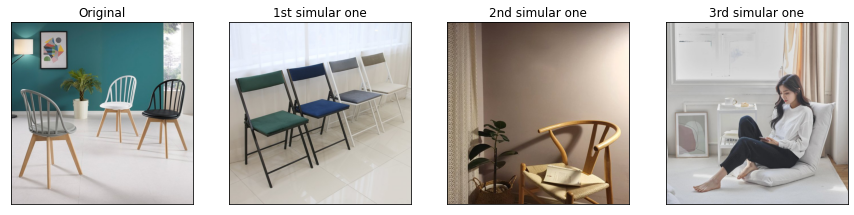

In [10]:
plotImages(2)